In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Time in days between consecutive uploads...

data = [152, 50, 221, 13, 143, 123, 125, 60, 76, 83, 35, 36, 99, 97, 98, 63, 42, 34, 24, 7, 77, 58, 31, 23, 44, 65, 36, 9, 26, 28, 24, 42, 20, 33, 30, 26, 23, 28, 27, 21, 25, 9, 11, 5, 18, 20, 23, 17, 15, 17, 16, 14, 4, 12, 13, 13, 14, 8, 11, 10, 30, 23, 5, 16, 6, 20]

In [3]:
df = pd.DataFrame(data = { 'y': reversed(data), 'x': range(len(data)) })

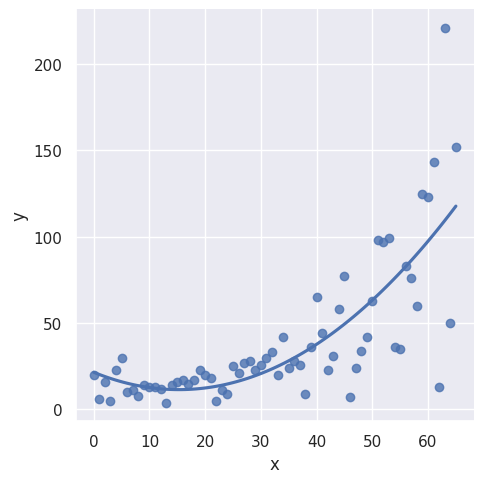

In [4]:
sns.set(rc={'figure.figsize': (11.7,8.27)})
sns.lmplot(x='x', y='y', order=2, ci=None, data=df)

We see that there's a general upwards trend of the *range* (i.e. more recent videos may be uploaded significantly further apart in time compared to older videos). The data are not i.i.d which means a simple linear regression is unlikely to generalize well. The diagram shows a polynomial regression of order two which shows some promise. However, the large variance is problematic. As the upper range increases, we see the variance also increases (there are also still videos uploaded close together).

We now investigate the correlation between video length and upload time.

In [5]:
#@markdown
video_lengths = [
    "34:11",
    "02:34",
    "1:09:09",
    "10:37",
    "26:19",
    "27:45",
    "29:27",
    "27:53",
    "02:18",
    "18:52",
    "07:12",
    "24:54",
    "09:08",
    "17:29",
    "19:16",
    "17:54",
    "19:12",
    "15:58",
    "18:31",
    "02:58",
    "30:44",
    "15:19",
    "23:54",
    "17:33",
    "15:24",
    "15:20",
    "14:52",
    "14:55",
    "11:47",
    "16:32",
    "10:25",
    "16:22",
    "17:20",
    "17:18",
    "13:36",
    "16:04",
    "14:25",
    "15:07",
    "16:05",
    "23:16",
    "20:33",
    "14:31",
    "11:37",
    "10:53",
    "16:54",
    "17:06",
    "11:35",
    "10:37",
    "17:10",
    "10:20",
    "09:25",
    "08:34",
    "09:52",
    "12:42",
    "09:58",
    "09:42",
    "12:14",
    "09:18",
    "08:57",
    "09:41",
    "07:28",
    "11:15",
    "07:44",
    "10:24",
    "05:00",
    "09:35",
    "09:16",
    "06:50",
    "13:19",
    "07:39",
    "08:20",
    "07:53",
    "07:19",
    "08:29",
    "10:26",
    "12:31",
    "05:14",
    "10:07",
    "09:24",
    "08:23",
    "06:51",
    "07:22",
    "09:13",
    "08:52",
    "12:09",
    "06:04",
    "06:57",
    "09:22",
    "07:16",
    "05:33",
    "04:24",
    "07:18",
    "06:47",
    "10:01",
    "07:49",
    "11:28",
    "04:23",
    "09:02",
    "07:37",
    "06:39",
    "06:30",
    "04:29",
    "09:45",
    "05:54",
    "07:48",
    "05:03",
    "11:02",
    "07:53",
    "07:54",
    "05:30",
    "08:10",
    "06:58",
    "10:29",
    "04:21",
    "07:43",
    "06:12",
    "06:23",
    "04:22",
    "05:15",
    "06:51",
    "07:15",
    "04:50",
    "05:24",
    "03:39",
    "05:36",
    "06:15",
    "05:10",
    "11:35",
    "05:34",
    "04:00",
    "08:35",
    "07:08",
    "15:08",
    "07:50",
    "04:53",
    "06:11",
    "08:35",
    "17:01",
    "06:01",
    "04:52",
    "12:05",
    "08:18",
    "05:41",
    "16:49",
    "06:26",
    "05:25",
    "15:35",
    "05:43",
    "06:13",
    "06:55",
    "06:36",
    "06:12",
    "06:42",
    "04:49",
    "04:10",
    "05:29",
    "08:17",
    "05:15",
    "05:19",
    "04:58",
    "07:58",
    "07:15",
    "06:09",
    "05:00",
    "06:48",
    "04:55",
    "09:40"
]

In [6]:
def convert_video_length_to_minutes(length):

    parts = length.split(':')
    seconds = int(parts[-1])
    minutes = int(parts[-2])
    hours = int(parts[0]) if len(parts) == 3 else 0

    hours = int(hours)
    minutes = int(minutes)

    return hours*60 + minutes

video_lengths = [convert_video_length_to_minutes(x) for x in video_lengths]

In [10]:
video_lengths

[34,
 2,
 69,
 10,
 26,
 27,
 29,
 27,
 2,
 18,
 7,
 24,
 9,
 17,
 19,
 17,
 19,
 15,
 18,
 2,
 30,
 15,
 23,
 17,
 15,
 15,
 14,
 14,
 11,
 16,
 10,
 16,
 17,
 17,
 13,
 16,
 14,
 15,
 16,
 23,
 20,
 14,
 11,
 10,
 16,
 17,
 11,
 10,
 17,
 10,
 9,
 8,
 9,
 12,
 9,
 9,
 12,
 9,
 8,
 9,
 7,
 11,
 7,
 10,
 5,
 9,
 9,
 6,
 13,
 7,
 8,
 7,
 7,
 8,
 10,
 12,
 5,
 10,
 9,
 8,
 6,
 7,
 9,
 8,
 12,
 6,
 6,
 9,
 7,
 5,
 4,
 7,
 6,
 10,
 7,
 11,
 4,
 9,
 7,
 6,
 6,
 4,
 9,
 5,
 7,
 5,
 11,
 7,
 7,
 5,
 8,
 6,
 10,
 4,
 7,
 6,
 6,
 4,
 5,
 6,
 7,
 4,
 5,
 3,
 5,
 6,
 5,
 11,
 5,
 4,
 8,
 7,
 15,
 7,
 4,
 6,
 8,
 17,
 6,
 4,
 12,
 8,
 5,
 16,
 6,
 5,
 15,
 5,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 5,
 8,
 5,
 5,
 4,
 7,
 7,
 6,
 5,
 6,
 4,
 9]

In [7]:
df2 = pd.DataFrame(data = { 'y': data, 'x': video_lengths[: len(data)] })

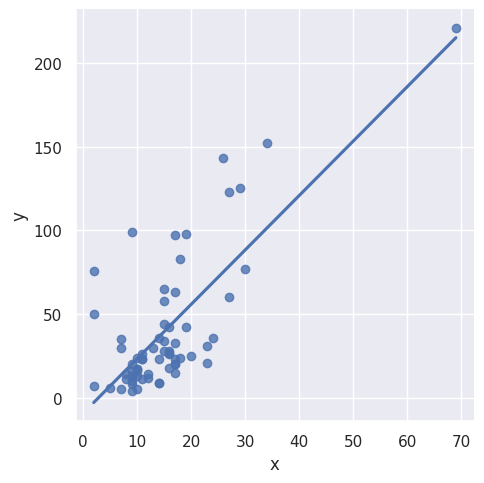

In [8]:
sns.lmplot(x='x', y='y', order=1, ci=None, data=df2)

We fit a linear regression relating video length (x minutes) to time since the last upload (y days).

In [9]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
x = np.array(df2.x).reshape(-1, 1)
y = np.array(df2.y)
reg = LinearRegression().fit(x, y)

In [ ]:
reg.score(x, y)

0.5595312663931913

We see that 56% of the variance is "explained" by this linear relationship. This is therefore quite a useful feature, however is one which isn't known in advance (we don't know the length of a video before it's been uploaded).

Nonetheless, let's observe how much variance may be explained using a combination of the index and the video length. We use 2nd-order polynomial features.

In [ ]:
v_index = np.array(range(len(data)))
v_length = x.flatten()
x1 = np.array([ v_index, v_length, v_index * v_length, v_index ** 2, v_length ** 2]).T

In [ ]:
reg1 = LinearRegression().fit(x1, y)
reg1.score(x1, y)

0.8080380545003637

Significantly better. We can explain 80% of the variance using a combination of the video length and video index.

In [ ]:
np.mean(np.abs(reg1.predict(x1) - y))

12.165859076034529

We see that the mean absolute error is 12.17, meaning on average, the model's predictions are 12 days away from the true upload delta.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


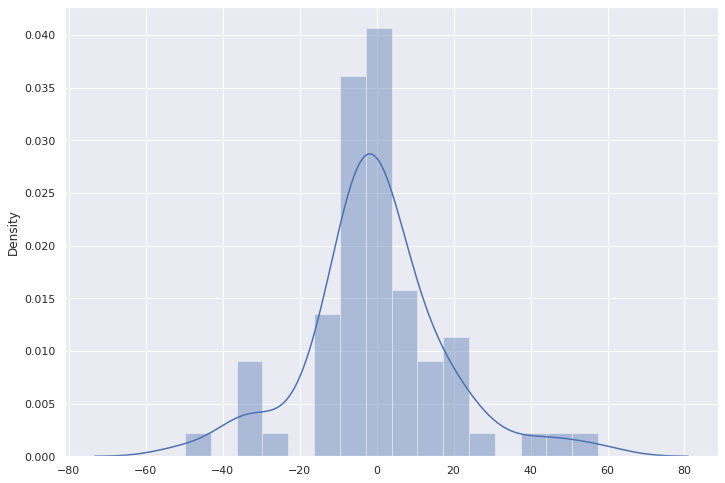

In [ ]:
# Distribution of residuals...

sns.distplot(reg1.predict(x1) - y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg2 = DecisionTreeRegressor(max_depth=3).fit(x1, y)
reg2.score(x1, y)

0.9097845343623487

In [ ]:
np.mean(np.abs(reg2.predict(x1) - y))

8.666666666666666

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


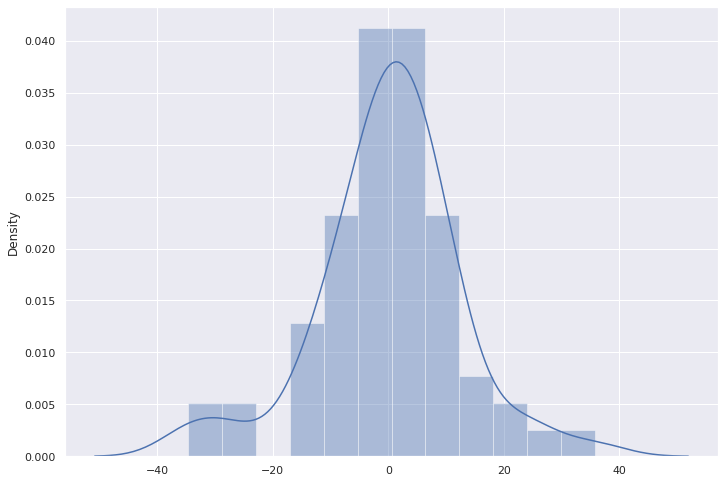

In [ ]:

sns.distplot(reg2.predict(x1) - y)

Now we experiment with an autoregressive model that predicts the delta given previous deltas.

In [ ]:
order = 4
x_ar = [data[i - order : i] for i in range(order, len(data) - order)]
y_ar = [data[i] for i in range(order, len(data) - order)]

x_ar = np.array(x_ar).astype(float)
y_ar = np.array(y_ar).astype(float)

In [ ]:
ar_reg = LinearRegression().fit(x_ar, y_ar)
ar_reg.score(x_ar, y_ar)

0.6313967533306553

In [ ]:
ar_reg1 = DecisionTreeRegressor(max_depth=3).fit(x_ar, y_ar)
ar_reg1.score(x_ar, y_ar)

0.7782482010086091

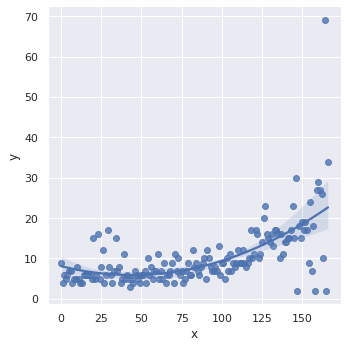

In [ ]:
df3 = pd.DataFrame(data = {'y': reversed(video_lengths), 'x': list(range(len(video_lengths))) })

sns.lmplot(order=2, x='x', y='y', data = df3)

In [ ]:
video_length_deltas = [(b - a) for a, b in zip(video_lengths[: -1], video_lengths[1 :])]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


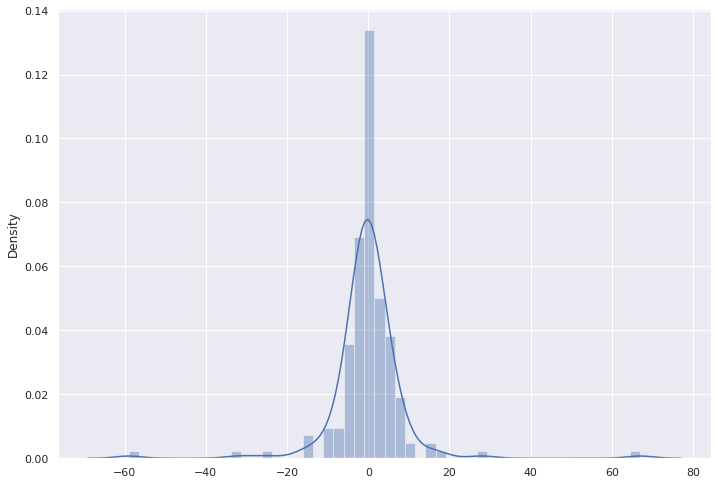

In [ ]:
sns.distplot(video_length_deltas)

In [ ]:
order1 = 1
vl = list(reversed(video_lengths))
video_lengths_x_ar = np.array([vl[i - order1 : i] for i in range(order1, len(vl) - order1)]).astype(float)
video_lengths_y_ar = np.array([vl[i] for i in range(order1, len(vl) - order1)]).astype(float)

In [ ]:
ar_reg2 = LinearRegression().fit(video_lengths_x_ar, video_lengths_y_ar)
ar_reg2.score(video_lengths_x_ar, video_lengths_y_ar)

0.049551640893016224

Next video prediction...

In [ ]:
x1

array([[   0,   34,    0,    0, 1156],
       [   1,    2,    2,    1,    4],
       [   2,   69,  138,    4, 4761],
       [   3,   10,   30,    9,  100],
       [   4,   26,  104,   16,  676],
       [   5,   27,  135,   25,  729],
       [   6,   29,  174,   36,  841],
       [   7,   27,  189,   49,  729],
       [   8,    2,   16,   64,    4],
       [   9,   18,  162,   81,  324],
       [  10,    7,   70,  100,   49],
       [  11,   24,  264,  121,  576],
       [  12,    9,  108,  144,   81],
       [  13,   17,  221,  169,  289],
       [  14,   19,  266,  196,  361],
       [  15,   17,  255,  225,  289],
       [  16,   19,  304,  256,  361],
       [  17,   15,  255,  289,  225],
       [  18,   18,  324,  324,  324],
       [  19,    2,   38,  361,    4],
       [  20,   30,  600,  400,  900],
       [  21,   15,  315,  441,  225],
       [  22,   23,  506,  484,  529],
       [  23,   17,  391,  529,  289],
       [  24,   15,  360,  576,  225],
       [  25,   15,  375,

In [ ]:
# video length probably around 40 minutes
# 

vi = 67.
vl = 40.

reg1.predict([ [ vi, vl, vi * vl, vi ** 2, vl ** 2] ])

array([-11.75242284])

In [ ]:
x2 = np.array([ v_index, v_length]).T

In [ ]:
reg4 = LinearRegression().fit(x2, y)

In [ ]:
reg4.score(x2, y)

0.7034559856918148

In [ ]:
reg4.predict([[ vi, vl ]])

array([66.65895292])